<a href="https://colab.research.google.com/github/AnirudhVIyer/NLP/blob/main/fastai2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# delete previous directory

!unzip drive/MyDrive/myntra.zip > /dev/null


In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('/content/myntradataset/styles.csv',error_bad_lines=False)
# add image name based on index
data['image'] = data.apply(lambda x: str(x['id'])+'.jpg',axis=1)
data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 1

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


In [6]:
data['image'][1]
a = data['articleType'].unique()
a

array(['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks',
       'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra',
       'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant',
       'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas',
       'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees',
       'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests',
       'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket',
       'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring',
       'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers',
       'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta',
       'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics',
       'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser',
       'Necklace and Chains', 'Duffel Bag', 'Sports Sandals',
       'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag',
       'Tracksuits', 'S

In [7]:
## create folder names from articleType
## based on articles type add each image to that folder to pass to data loader
## can skip this step if data already available in filder seperated format


import os
!mkdir image_articles
root_path = 'image_articles'
  
list = a
  
for items in list:
    path = os.path.join(root_path, items)
    os.mkdir(path)

In [8]:
## add images to the folders
import shutil


def image_add(filename, filetype):
  src_root = '/content/myntradataset/images'
  path_src = os.path.join(src_root, filename)
  dest_root = 'image_articles'
  path_dest = os.path.join(dest_root, filetype,filename)
  try:
    os.rename(path_src , path_dest )
  except:
    print("An exception occurred")
  

data.apply(lambda row: image_add(str(row['image']),row['articleType']),axis = 1)

An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred


0        None
1        None
2        None
3        None
4        None
         ... 
44419    None
44420    None
44421    None
44422    None
44423    None
Length: 44424, dtype: object

In [12]:
!zip -r articles.zip image_articles
!zip -r drive/MyDrive/articles.zip image_articles

Streaming output truncated to the last 5000 lines.
  adding: image_articles/Casual Shoes/25474.jpg (deflated 54%)
  adding: image_articles/Casual Shoes/20710.jpg (deflated 55%)
  adding: image_articles/Casual Shoes/1546.jpg (deflated 7%)
  adding: image_articles/Casual Shoes/4441.jpg (deflated 3%)
  adding: image_articles/Casual Shoes/24301.jpg (deflated 55%)
  adding: image_articles/Casual Shoes/33852.jpg (deflated 53%)
  adding: image_articles/Casual Shoes/57521.jpg (deflated 57%)
  adding: image_articles/Casual Shoes/39969.jpg (deflated 56%)
  adding: image_articles/Casual Shoes/33857.jpg (deflated 11%)
  adding: image_articles/Casual Shoes/57494.jpg (deflated 56%)
  adding: image_articles/Casual Shoes/7367.jpg (deflated 4%)
  adding: image_articles/Casual Shoes/23930.jpg (deflated 56%)
  adding: image_articles/Casual Shoes/13365.jpg (deflated 4%)
  adding: image_articles/Casual Shoes/13927.jpg (deflated 50%)
  adding: image_articles/Casual Shoes/15219.jpg (deflated 48%)
  adding: i

In [3]:
## use articles.zip from drive for future use
!unzip drive/MyDrive/articles.zip > /dev/null

In [36]:
## code to remove folders/classes with items less than 4
import os
import shutil




# folder path
dir_path = 'image_articles'
import os

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    label = os.path.join(dir_path, path)
    lst = os.listdir(label) # your directory path
    number_files = len(lst)
    if(number_files < 50):
      shutil.rmtree(label)
      print(label+'removed')

image_articles/Makeup Removerremoved
image_articles/Salwarremoved
image_articles/Jeggingsremoved
image_articles/Key chainremoved
image_articles/Lounge Tshirtsremoved
image_articles/Headbandremoved
image_articles/Body Lotionremoved
image_articles/Shoe Accessoriesremoved
image_articles/Rucksacksremoved
image_articles/Ties and Cufflinksremoved
image_articles/Hatremoved
image_articles/Hair Accessoryremoved
image_articles/Tablet Sleeveremoved
image_articles/Bootiesremoved
image_articles/Churidarremoved
image_articles/Blazersremoved
image_articles/Nehru Jacketsremoved
image_articles/Compactremoved
image_articles/Rain Jacketremoved
image_articles/Lip Linerremoved
image_articles/Travel Accessoryremoved
image_articles/Rain Trousersremoved
image_articles/Water Bottleremoved
image_articles/Lip Plumperremoved
image_articles/Patialaremoved
image_articles/Tightsremoved
image_articles/Trolley Bagremoved
image_articles/Clothing Setremoved
image_articles/Wristbandsremoved
image_articles/Messenger Bagre

In [37]:
## DataBlock

articles = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

#DataLoader
dls = articles.dataloaders(source = "image_articles")

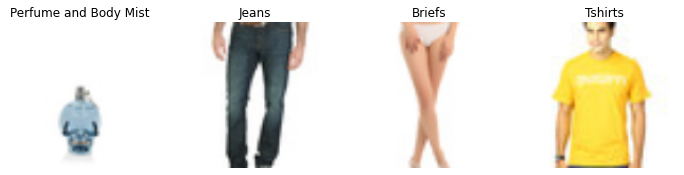

In [38]:
dls.valid.show_batch(max_n=4, nrows=1)

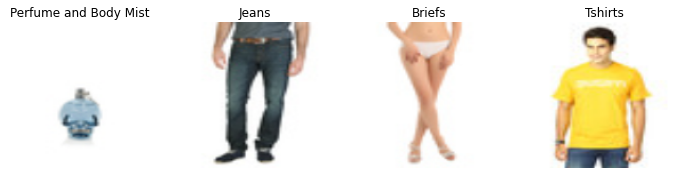

In [39]:
path = 'image_articles'
articles = articles.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = articles.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

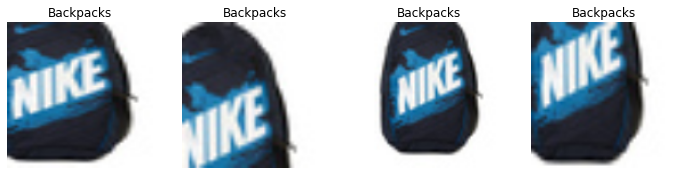

In [40]:
## rather than cropping or squishing use random cropping in each epoch
articles = articles.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = articles.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [41]:
## manually deleted ipad class

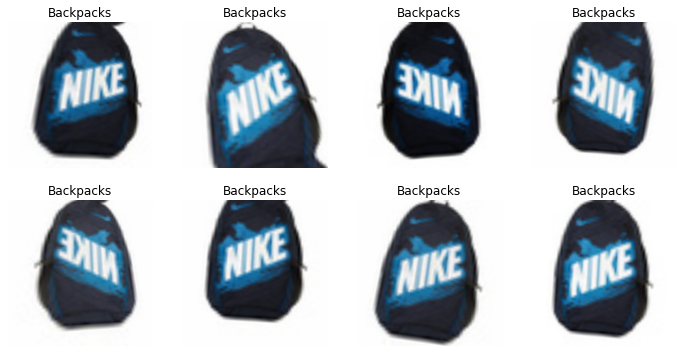

In [42]:
##Data augmentation

articles = articles.new(item_tfms=Resize(224), batch_tfms=aug_transforms())
dls = articles.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [43]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.126287,0.755965,0.224812,01:57


epoch,train_loss,valid_loss,error_rate,time
0,0.701368,0.529446,0.163531,02:19
1,0.553714,0.437369,0.141373,02:19


epoch,train_loss,valid_loss,error_rate,time
0,0.701368,0.529446,0.163531,02:19
1,0.553714,0.437369,0.141373,02:19
2,0.414345,0.374997,0.120369,02:17
3,0.334245,0.354685,0.112637,02:19


In [47]:
learn.export()

In [48]:
#inference as in deployed application
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [49]:
learn_inf = load_learner(path/'export.pkl')

learn_inf.predict('/content/image_articles/Dresses/13290.jpg') 

('Dresses',
 TensorBase(14),
 TensorBase([2.7233e-07, 4.8814e-06, 1.4118e-06, 1.5187e-06, 4.0965e-05,
             2.5225e-06, 1.5637e-06, 1.3371e-05, 8.1455e-06, 2.6448e-05,
             1.9867e-05, 2.1481e-04, 1.7193e-05, 3.9316e-06, 9.3231e-01,
             1.7381e-07, 2.2220e-06, 2.5927e-05, 7.2740e-07, 2.2373e-06,
             1.5774e-06, 1.2204e-06, 1.2866e-06, 4.6115e-07, 7.0509e-07,
             4.5522e-06, 1.4274e-06, 2.1560e-06, 1.6997e-04, 6.1860e-07,
             2.4677e-06, 5.1304e-07, 9.6714e-07, 3.4689e-05, 1.0667e-04,
             4.4565e-05, 3.3310e-07, 3.7550e-05, 1.1164e-06, 4.4584e-06,
             5.3841e-07, 2.2774e-06, 5.2163e-06, 1.4476e-05, 5.0014e-05,
             1.5276e-05, 2.8806e-05, 2.5899e-05, 2.3433e-06, 2.0739e-06,
             3.6814e-06, 6.3150e-05, 1.8292e-04, 7.3120e-03, 3.7854e-05,
             1.8961e-06, 1.7537e-05, 5.6524e-06, 3.3183e-07, 2.2273e-07,
             3.5125e-07, 5.8773e-06, 5.8191e-02, 1.0930e-06, 3.0362e-06,
             9.5151e-0

In [50]:
!zip -r drive/MyDrive/fashion_model1.pkl export.pkl

  adding: export.pkl (deflated 8%)
